In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [9]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

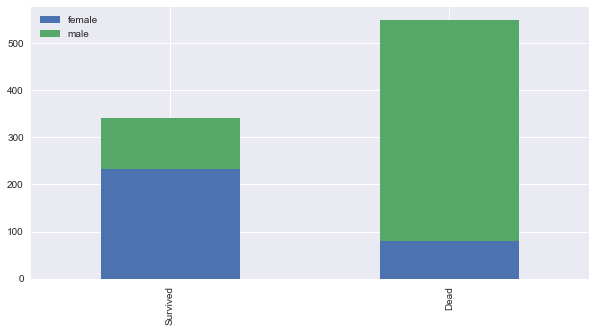

In [10]:
bar_chart("Sex")

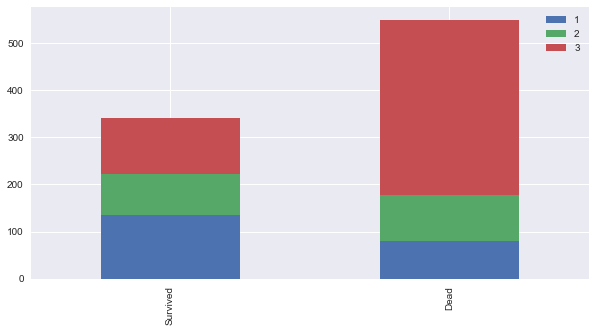

In [11]:
bar_chart('Pclass')

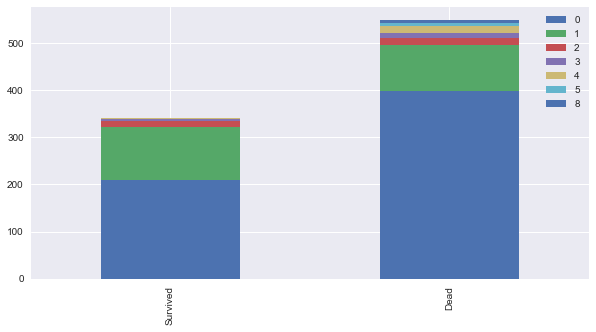

In [12]:
bar_chart("SibSp")

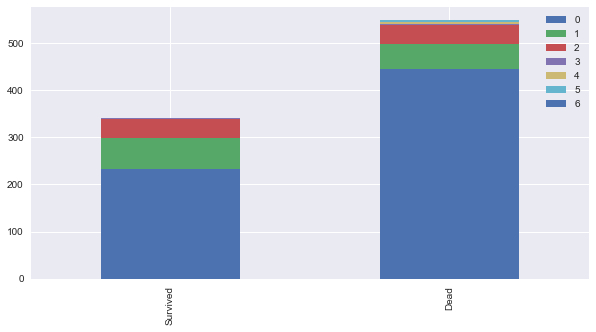

In [13]:
bar_chart("Parch")

In [14]:
train_test_data = [train,test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [15]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Jonkheer      1
Countess      1
Lady          1
Ms            1
Don           1
Mme           1
Sir           1
Name: Title, dtype: int64

In [16]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


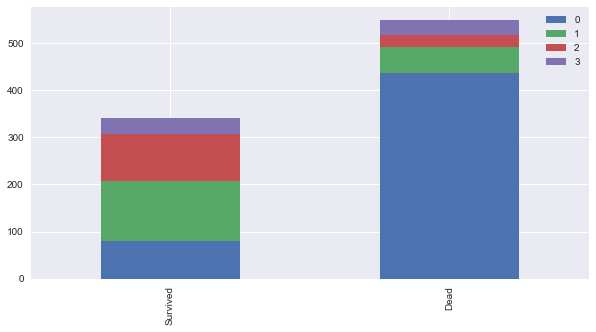

In [18]:
bar_chart("Title")

In [19]:
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1, inplace=True)

In [20]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

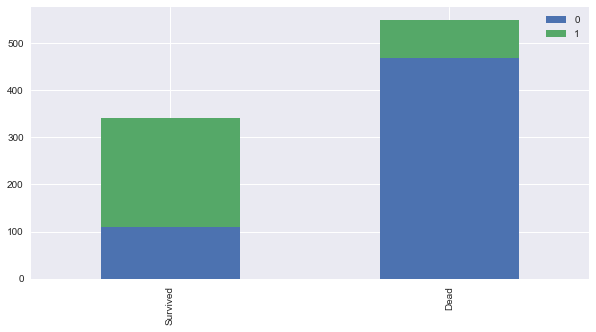

In [21]:
bar_chart("Sex")

In [22]:
test.head(100)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,0,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,1,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,0,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,1,18.0,0,0,2657,7.2292,NaN,C,2
9,901,3,0,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [23]:
grp = train.groupby("Title")["Age"]
grp.describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
0,398.0,32.368090,12.708793,11.00,23.000,30.0,39.0,80.0
1,146.0,21.773973,12.990292,0.75,14.125,21.0,30.0,63.0
2,108.0,35.898148,11.433628,14.00,27.750,35.0,44.0,63.0
3,62.0,20.430161,20.802576,0.42,3.000,9.0,39.5,70.0


In [24]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("mean"),inplace=True)

C:\Users\zone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


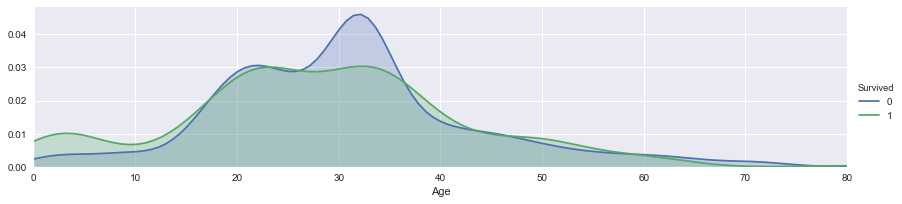

In [25]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.show()

In [ ]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"] <=16, "Age"] = 0,
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <=26), "Age"] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

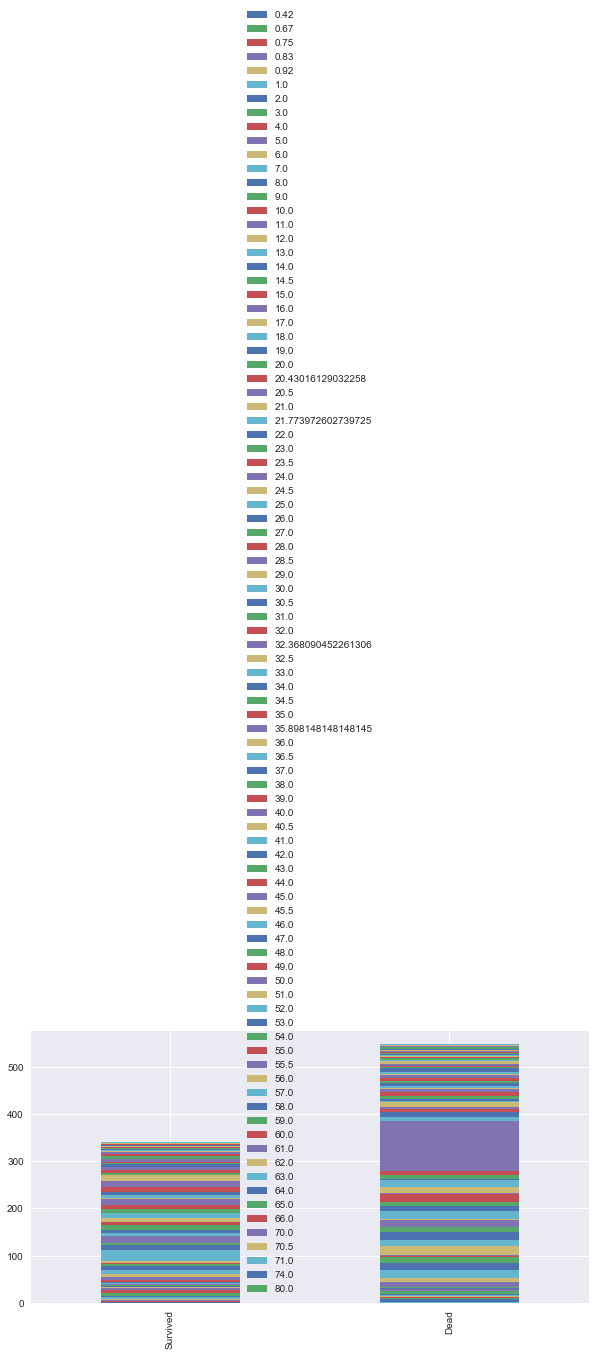

In [26]:
bar_chart("Age")

In [ ]:
Pclass1 = train[train["Pclass"]==1]["Embarked"].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ["1st Class", "2nd Class", "3rd Class"]
df.plot(kind='bar',stacked = True, figsize=(10,5))


In [27]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

In [30]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("mean"), inplace=True)

In [ ]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"]<=17, "Fare"] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


In [ ]:
train.Cabin.value_counts()

In [32]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

In [33]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.000000,1,0,113803,53.1000,C,0,2
4,5,0,3,0,35.000000,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,32.368090,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,54.000000,0,0,17463,51.8625,E,0,0
7,8,0,3,0,2.000000,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,27.000000,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,14.000000,1,0,237736,30.0708,NaN,1,2


In [ ]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [34]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [35]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [ ]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [36]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,2.0,0,0
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,0.8,1,2
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,2.0,0,1
3,4,1,1,1,35.000000,1,0,113803,53.1000,0.8,0,2
4,5,0,3,0,35.000000,0,0,373450,8.0500,2.0,0,0
5,6,0,3,0,32.368090,0,0,330877,8.4583,2.0,2,0
6,7,0,1,0,54.000000,0,0,17463,51.8625,1.6,0,0
7,8,0,3,0,2.000000,3,1,349909,21.0750,2.0,0,3
8,9,1,3,1,27.000000,0,2,347742,11.1333,2.0,0,2
9,10,1,2,1,14.000000,1,0,237736,30.0708,1.8,1,2


In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
train.head(10)

In [ ]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [ ]:
features_drop = ["Ticket","SibSp","Parch"]
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(["PassengerId"], axis=1)

In [ ]:
train_data = train.drop("Survived",axis=1)
target = train["Survived"]

train_data.shape, target.shape

In [45]:
 # Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [ ]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = "accuracy"
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100,2)

In [ ]:
clf = DecisionTreeClassifier()
scoring = "accuracy"
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100,2)

In [ ]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100,2)

In [ ]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100,2)

In [ ]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100,2)

In [ ]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId",axis=1).copy()
prediction = clf.predict(test_data)

In [ ]:
submission = pd.DataFrame({
                            "PassengerId":test["PassengerId"],
                            "Survived" : prediction
                          })
submission.to_csv("submission.csv",index=False)

In [37]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,2.0,0,0
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,0.8,1,2
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,2.0,0,1
3,4,1,1,1,35.000000,1,0,113803,53.1000,0.8,0,2
4,5,0,3,0,35.000000,0,0,373450,8.0500,2.0,0,0
5,6,0,3,0,32.368090,0,0,330877,8.4583,2.0,2,0
6,7,0,1,0,54.000000,0,0,17463,51.8625,1.6,0,0
7,8,0,3,0,2.000000,3,1,349909,21.0750,2.0,0,3
8,9,1,3,1,27.000000,0,2,347742,11.1333,2.0,0,2
9,10,1,2,1,14.000000,1,0,237736,30.0708,1.8,1,2


In [38]:
train_set = train.drop(["PassengerId","Survived","Ticket"],axis=1)

In [39]:
train_set

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,0,22.000000,1,0,7.2500,2.0,0,0
1,1,1,38.000000,1,0,71.2833,0.8,1,2
2,3,1,26.000000,0,0,7.9250,2.0,0,1
3,1,1,35.000000,1,0,53.1000,0.8,0,2
4,3,0,35.000000,0,0,8.0500,2.0,0,0
5,3,0,32.368090,0,0,8.4583,2.0,2,0
6,1,0,54.000000,0,0,51.8625,1.6,0,0
7,3,0,2.000000,3,1,21.0750,2.0,0,3
8,3,1,27.000000,0,2,11.1333,2.0,0,2
9,2,1,14.000000,1,0,30.0708,1.8,1,2


In [40]:
target = train["Survived"]

In [41]:
target

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [42]:
test_set = test.drop(["PassengerId", "Ticket"],axis=1)

In [43]:
test_set

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,0,34.500000,0,0,7.8292,2.0,2,0
1,3,1,47.000000,1,0,7.0000,0.8,0,2
2,2,0,62.000000,0,0,9.6875,2.0,2,0
3,3,0,27.000000,0,0,8.6625,0.8,0,0
4,3,1,22.000000,1,1,12.2875,2.0,0,2
5,3,0,14.000000,0,0,9.2250,2.0,0,0
6,3,1,30.000000,0,0,7.6292,0.8,2,1
7,2,0,26.000000,1,1,29.0000,2.0,0,0
8,3,1,18.000000,0,0,7.2292,2.0,1,2
9,3,0,21.000000,2,0,24.1500,1.8,0,0


In [46]:
rf = RandomForestClassifier(max_depth=3, n_estimators=32, n_jobs=-1, class_weight="balanced")
rf.fit(train_set,target)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [47]:
predict = rf.predict(test_set)

In [48]:
predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [49]:
submission = pd.DataFrame({
                            "PassengerId":test["PassengerId"],
                            "Survived" : predict
                          })
submission.to_csv("submission8.csv",index=False)